In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv('Comcast_telecom_complaints_data.csv')
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [9]:
df['date_index']=df['Date_month_year']+ " "+df['Time']

In [10]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
date_index                     object
dtype: object

In [11]:
df['date_index']=pd.to_datetime(df['date_index'])

In [12]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [14]:
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])

In [15]:
df=df.set_index(df['date_index'])

In [16]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-08-04
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18


In [17]:
df['Date_month_year'].value_counts()[:3]

2015-06-24    218
2015-06-23    190
2015-06-25     98
Name: Date_month_year, dtype: int64

In [18]:
df['Date_month_year'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-17      7
2015-12-05      7
2015-05-04      6
2015-11-04      5
2015-03-05      5
Name: Date_month_year, Length: 91, dtype: int64

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: Date_month_year, dtype: int64


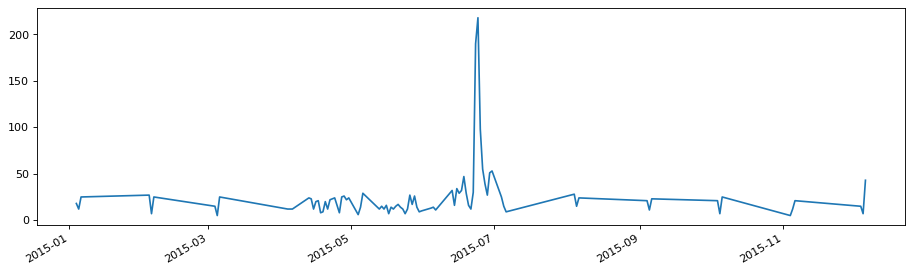

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(14,4),dpi=80)
fd=df['Date_month_year'].value_counts()
print(fd.head())
fd.plot();

In [21]:
fm=df.groupby(pd.Grouper(freq='M')).size()

<AxesSubplot:xlabel='date_index'>

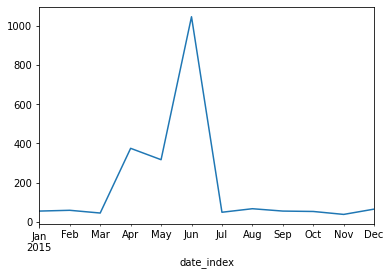

In [22]:
fm.plot()

In [24]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [25]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-08-04
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18


In [27]:
df['newStatus']=["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df['Status']]

In [28]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,,newStatus
date_index,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-08-04,Closed


In [30]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"},axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [32]:
status_complaints=df.groupby(["State","newStatus"]).size().unstack().fillna(0)
status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:ylabel='State'>

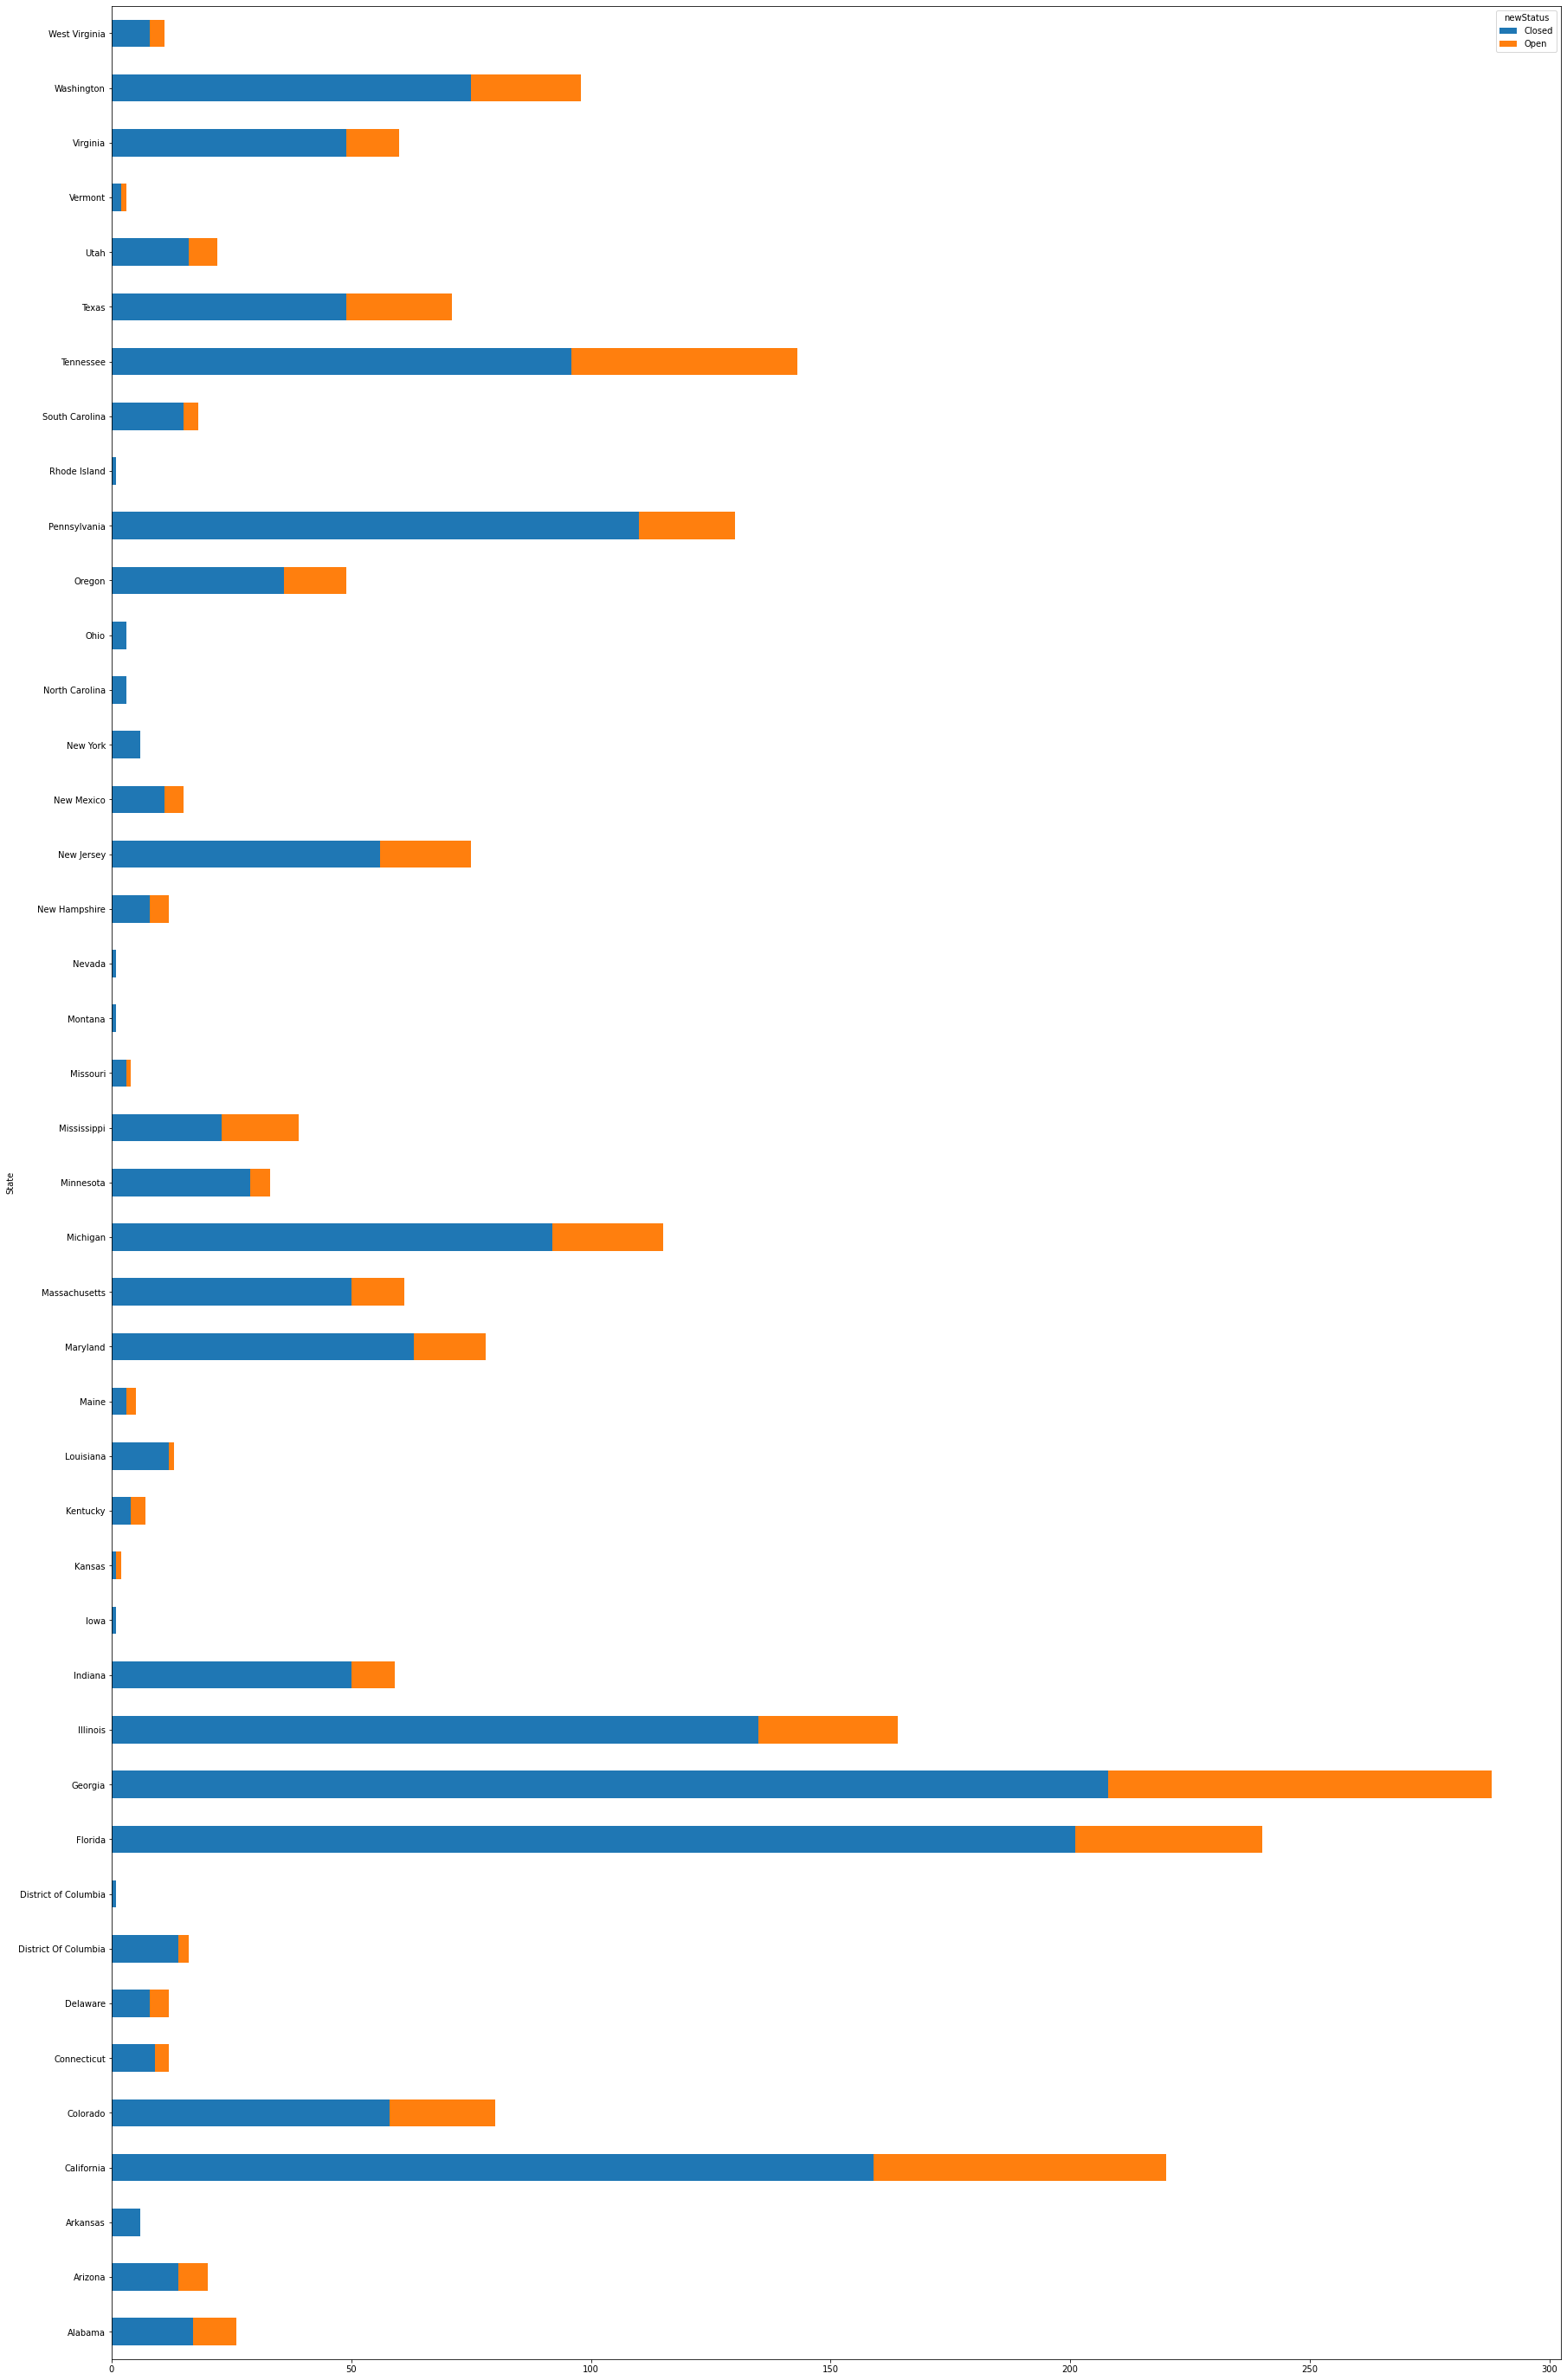

In [33]:
status_complaints.plot(kind='barh',figsize=(30,50),stacked=True)

In [35]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"},axis=1).max()

State    West Virginia
Count              288
dtype: object

In [37]:
df.groupby(['State','newStatus']).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [38]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string 
import nltk

In [39]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))
exclude=set(string.punctuation)
lemma=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/labsuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def clean(doc):
    stop_free=" ".join([i for i in doc.lower().split() if i not in stop])
    punc_free="".join([ch for ch in stop_free if ch not in exclude])
    normalised=" ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [41]:
import nltk
nltk.download('wordnet')
doc_complete=df['Customer Complaint'].tolist()
doc_clean=[clean(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /home/labsuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
import gensim
from gensim import corpora

In [43]:
dictionary=corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [44]:
doc_term_matrix=[dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix[:10]

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)]]

In [45]:
from gensim.models import LdaModel
Num_Topic=9
ldamodel=LdaModel(doc_term_matrix,num_topics=Num_Topic,id2word=dictionary,passes=30)

In [47]:
topics=ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.102*"comcast" + 0.054*"charge" + 0.034*"problem" + 0.025*"internet" + 0.025*"overage" + 0.024*"access" + 0.024*"bill" + 0.023*"account" + 0.019*"modem" + 0.017*"monopoly"')

(1, '0.143*"speed" + 0.134*"internet" + 0.082*"comcast" + 0.022*"business" + 0.021*"charge" + 0.021*"fraudulent" + 0.021*"promised" + 0.018*"home" + 0.015*"installation" + 0.015*"slow"')

(2, '0.114*"comcast" + 0.051*"xfinity" + 0.050*"internet" + 0.045*"cable" + 0.042*"throttling" + 0.022*"contract" + 0.020*"high" + 0.016*"bandwidth" + 0.014*"xfinitycomcast" + 0.014*"without"')

(3, '0.094*"issue" + 0.058*"comcast" + 0.047*"billing" + 0.045*"service" + 0.039*"speed" + 0.024*"paying" + 0.021*"help" + 0.018*"show" + 0.017*"incorrect" + 0.016*"payment"')

(4, '0.187*"billing" + 0.113*"comcast" + 0.065*"practice" + 0.061*"service" + 0.056*"unfair" + 0.036*"pricing" + 0.025*"comcastxfinity" + 0.019*"failure" + 0.018*"monopolistic" + 0.017*"back"')

(5, '0.158*"data" + 0.133*"comcast" + 0.128*"cap" + 0.035*"bill"

In [48]:
word_dict={}
for i in range(Num_Topic):
    words=ldamodel.show_topic(i,topn=10)
    word_dict["Topic # "+ "{}".format(i)=[i[0] for i in words]
              

SyntaxError: invalid syntax (<ipython-input-48-cbf90cb133be>, line 4)